In [52]:
from chemaphy import Statistics as stats
from chemaphy import LoadData
from matplotlib import pyplot as plt
from sklearn import metrics,linear_model,model_selection,preprocessing
import pandas as pd
import numpy as np

In [53]:
LoadData.data_name()

['binance_coin',
 'bitcoin',
 'breast_cancer',
 'cwg_players_participated',
 'cwg_players_won_medal',
 'doge_coin',
 'ds_salaries',
 'elements',
 'employees_info',
 'ethereum_coin',
 'iris',
 'music',
 'programming_lang_data',
 'quikr_cars',
 'student_mat',
 'tic_tac_toe',
 'tips',
 'weather',
 'weight_height',
 'winequality-red']

In [54]:
data = LoadData.load_data(file="ds_salaries",ext="csv")
data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [55]:
data.isna().values.any()

False

In [56]:
df = data.drop(columns = "Unnamed: 0")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [57]:
max(df["salary"]),min(df["salary"])

(30400000, 4000)

In [58]:
df[df["salary"] == max(df["salary"])]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
177,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L


In [59]:
df[df["salary"] == min(df["salary"])]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
185,2021,MI,FT,Data Engineer,4000,USD,4000,IR,100,IR,M
238,2021,EN,FT,Data Scientist,4000,USD,4000,VN,0,VN,M


In [13]:
p = preprocessing.LabelEncoder()
df["experience_level"] = p.fit_transform(df["experience_level"])
df["employment_type"] = p.fit_transform(df["employment_type"])
df["job_title"] = p.fit_transform(df["job_title"])
df["salary_currency"] = p.fit_transform(df["salary_currency"])
df["employee_residence"] = p.fit_transform(df["employee_residence"])
df["company_location"] = p.fit_transform(df["company_location"])
df["company_size"] = p.fit_transform(df["company_size"])

In [14]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,2,2,22,70000,7,79833,14,0,12,0
1,2020,3,2,41,260000,16,260000,32,0,29,2
2,2020,3,2,7,85000,8,109024,20,50,18,1
3,2020,2,2,47,20000,16,20000,23,0,20,2
4,2020,3,2,38,150000,16,150000,55,50,48,0
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,3,2,17,154000,16,154000,55,100,48,1
603,2022,3,2,17,126000,16,126000,55,100,48,1
604,2022,3,2,12,129000,16,129000,55,0,48,1
605,2022,3,2,12,150000,16,150000,55,100,48,1


In [15]:
x = df.drop(columns="salary")
y = df["salary"]

In [24]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.1)
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
prediction = model.predict(x_test)
prediction

array([583550.66812232, 464474.2686471 ,  34582.6838184 , 554349.41076291,
       658508.53552458, 783888.29897732, 300156.75464353, 838370.27500567,
        63583.62293896,  -2026.16281635, 345999.36708307, 399294.28822514,
       457655.71221691,   5740.03615761, 427430.92033088, 201837.06676418,
       376342.23441339, 137909.62997916, 331555.89533085,  38101.38221347,
       233018.86071682, 146893.0561395 , 108918.06556341,   3354.13938522,
       159759.17156497, 405450.48854291, 520362.98547441, 664315.27949595,
       139347.45333129,  97254.13781345,  88318.20319667, 503058.81434745,
         1490.07160103,  24572.16862264, 500028.15794221, 624510.07150552,
       544813.09776562, 169118.22674614,  -7330.96933445, 117937.02044931,
       367071.43076587, 293706.98875022, 561789.09023795, 657037.60406235,
       246919.44226167, 717342.25293306, 461038.08314252, 346127.01202127,
       131419.76558104, 402424.68472582, 372379.09429127, 184911.55073062,
       330992.11105382, 6

Text(0, 0.5, 'Salary')

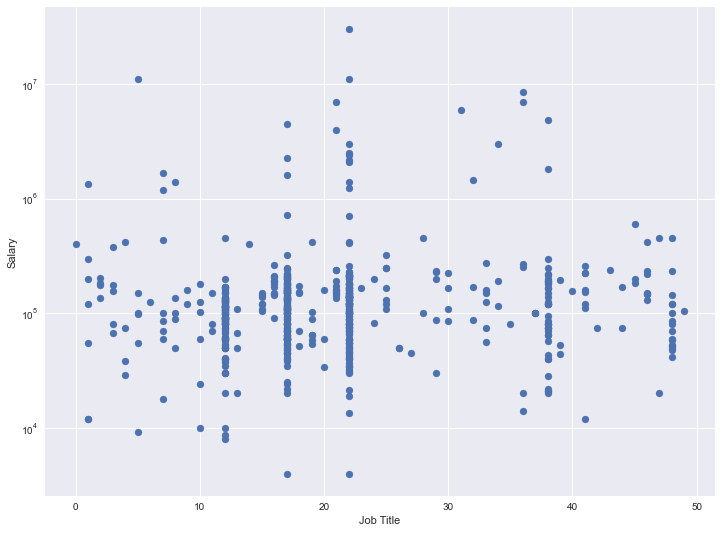

In [40]:
plt.figure(figsize=(12,9))
plt.style.use("seaborn")
plt.yscale("log")
plt.scatter(data["job_title"],data["salary"])
plt.xlabel("Job Title")
plt.ylabel("Salary")

In [27]:
stats.Error(list(y_test),prediction)

[4316449.331877679,
 -354474.2686471045,
 55417.316181600094,
 -519349.4107629061,
 10341491.464475423,
 -715888.2989773154,
 -140156.75464352965,
 -603370.2750056684,
 146416.3770610392,
 152026.1628163457,
 -165999.36708307266,
 -289294.28822514415,
 -387655.7122169137,
 100519.96384239197,
 -367430.9203308821,
 38162.93323582411,
 -176342.2344133854,
 -17749.62997916341,
 -296555.8953308463,
 161898.61778652668,
 6766981.13928318,
 -46893.05613949895,
 27681.93443658948,
 238645.8606147766,
 -81759.17156496644,
 -295450.4885429144,
 -450363.9854744077,
 -626859.2794959545,
 -33947.453331291676,
 62745.862186551094,
 41681.796803325415,
 -461058.81434744596,
 128509.92839896679,
 77527.83137735724,
 -450028.15794220567,
 -604510.0715055168,
 -121813.09776562452,
 -111118.22674614191,
 157330.96933445334,
 17062.97955068946,
 -193071.43076586723,
 -93706.98875021935,
 -519789.0902379453,
 1592962.3959376514,
 -196919.44226166606,
 -678942.2529330552,
 -191038.083142519,
 -327127.01202